# 04. Association Rules

Generate association rules from the frequent itemsets and visualize them.

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## 1. Load Frequent Itemsets
**Note:** When loading from CSV, `frozenset` objects are read as strings. We need to parse them back.

In [2]:
data_path = os.path.join("..", "results", "frequent_itemsets.csv")
frequent_itemsets = pd.read_csv(data_path)

# Convert string representation of frozenset back to frozenset object
try:
    frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: eval(x))
except Exception as e:
    print("Error converting itemsets. Make sure the CSV was saved correctly.")
    print(e)

frequent_itemsets.head()

,support,itemsets,length
0,0.033950,(beef),1
1,0.021787,(berries),1
2,0.016574,(beverages),1
3,0.045312,(bottled beer),1
4,0.060683,(bottled water),1


## 2. Generate Rules

In [3]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711


In [4]:
# Sort by confidence
rules.sort_values('confidence', ascending=False, inplace=True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
9,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,1.0,-0.003707,0.956636,-0.260917,0.047776,-0.045329,0.096694
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
6,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,1.0,-0.003707,0.974663,-0.274587,0.047776,-0.025995,0.096694
8,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317


## 3. Visualization

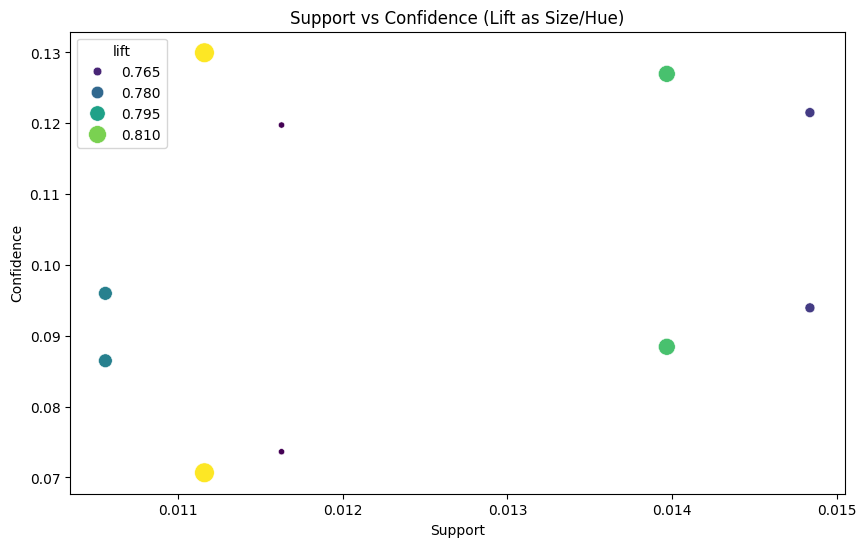

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette="viridis", sizes=(20, 200))
plt.title('Support vs Confidence (Lift as Size/Hue)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

## 4. Save Rules

In [6]:
output_path = os.path.join("..", "results", "association_rules.csv")
rules.to_csv(output_path, index=False)
print(f"Saved to {output_path}")

Saved to ..\results\association_rules.csv
